In [3]:
import pandas as pd
import wrangle
import new_wrangle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# acquire data

In [4]:
# use function to acquire data
df1= wrangle.acquire_data()

In [5]:
#check  info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Type          6435 non-null   object 
 9   Size          6435 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 553.0+ KB


In [65]:
df1.shape

(6435, 10)

# Ouliers store_size

We are exploring the store_type vs store_size, we notice that there are outliers

<AxesSubplot:xlabel='Type', ylabel='Size'>

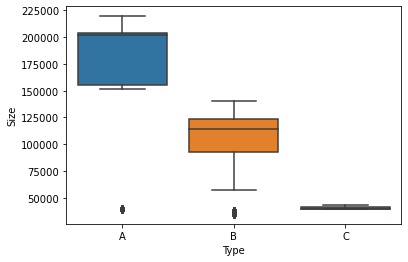

In [6]:
sns.boxplot(x= df1['Type'], y= df1['Size'])

(0.0, 46000.0)

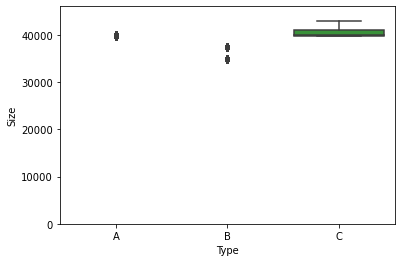

In [7]:
#check only the outliers
sns.boxplot(x= df1['Type'], y= df1['Size'])
plt.ylim(0,46000)

we can see there are outliers for B and A and we decided to change those to  store type C

In [8]:
#getting a df that has all store_size < 50000 and df.store_type != "C"
df3 = df1 [(df1.Size < 50000) & (df1.Type != "C")]

In [9]:
#lets see which stores type A  are df.store_size < 50000
df3[df3.Type == "A"].groupby('Store').count()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Store,,,,,,,,,
33,143,143,143,143,143,143,143,143,143
36,143,143,143,143,143,143,143,143,143


In [10]:
#lets see which stores type A  are df.store_size < 50000
df3[df3.Type == "B"].groupby('Store').count()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Store,,,,,,,,,
3,143,143,143,143,143,143,143,143,143
5,143,143,143,143,143,143,143,143,143


In [11]:
# I gave the sote Id to Natasha so she is going to change the type.

# Wrangle

In [30]:
#using the funcion wrangle
df= new_wrangle.wrangle_walmart()

Note: this function gives us  new columns and rename columns

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            6435 non-null   int64  
 1   weekly_sales        6435 non-null   float64
 2   holiday_flag        6435 non-null   int64  
 3   temperature         6435 non-null   int64  
 4   fuel_price          6435 non-null   float64
 5   CPI                 6435 non-null   float64
 6   unemployment        6435 non-null   float64
 7   store_type          6435 non-null   object 
 8   store_size          6435 non-null   int64  
 9   month               6435 non-null   object 
 10  year                6435 non-null   int64  
 11  quarter             6435 non-null   int64  
 12  weekday             6435 non-null   object 
 13  week_of_year        6435 non-null   int64  
 14  deflated_series     6435 non-null   float64
 15  sales_delta_weekly  6435 non-null   f

In [14]:
df.head(1)

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,...,quarter,weekday,week_of_year,deflated_series,sales_delta_weekly,sales_delta_yearly,gas_delta_weekly,gas_delta_yearly,season,holiday_name
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1643690.9,0,42,2.57,211.096,8.106,A,151315,February,...,1,Friday,5,7786.46,0.0,0.0,0.0,0.0,Winter,no_holiday


In [15]:
def distribution (df):
    '''
    takes in a df and plot individual variable distributions excluding object type
    '''
    plt.figure
    plt.style.use("ggplot")
    cols =df.columns.to_list()
    for col in cols:
        if df[col].dtype != 'object':
            plt.hist(df[col],color ='blue')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Number of Weeks ')
            plt.xticks(rotation=45)
            plt.ticklabel_format(style = 'plain')
            
            plt.show()

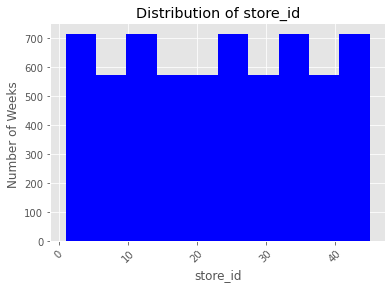

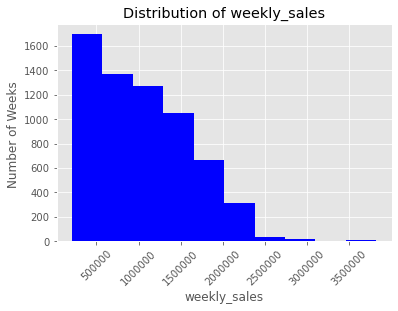

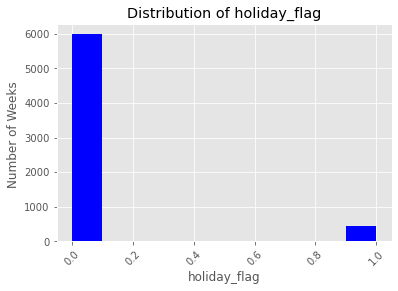

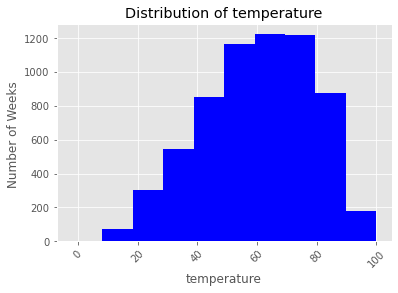

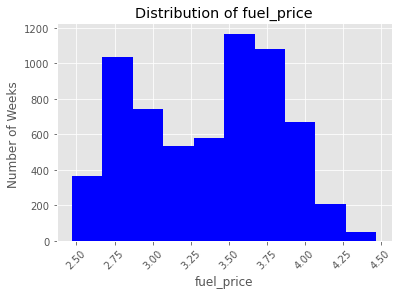

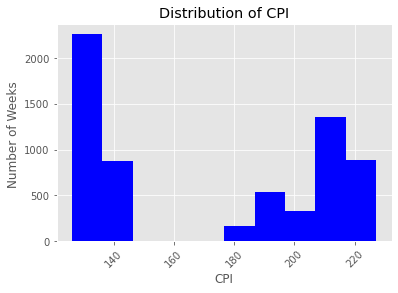

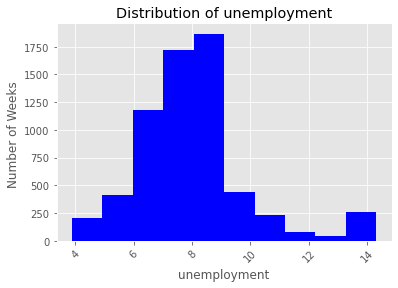

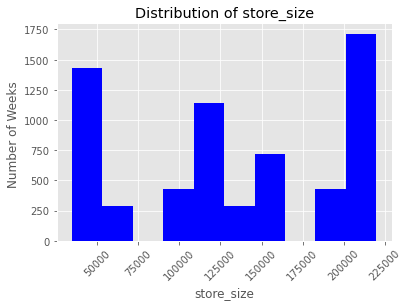

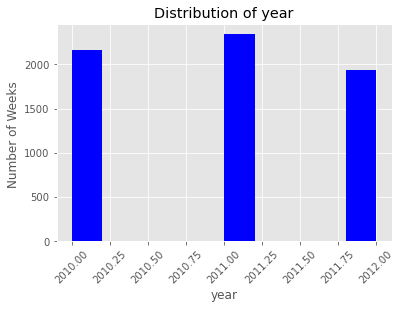

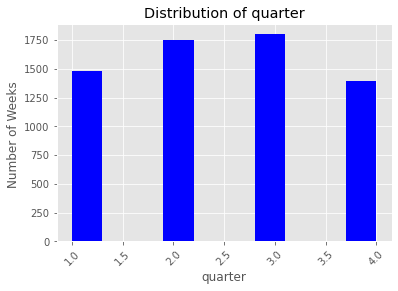

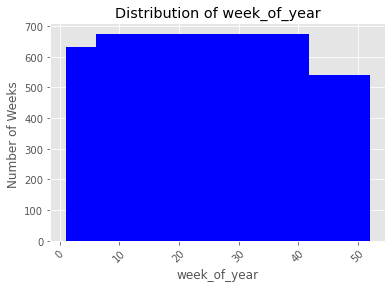

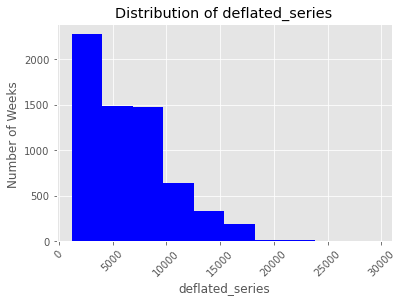

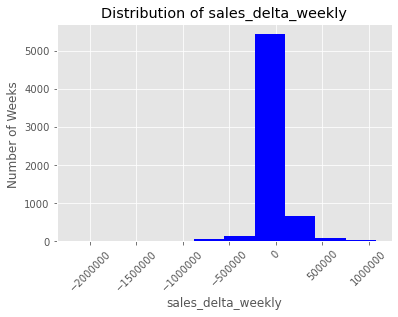

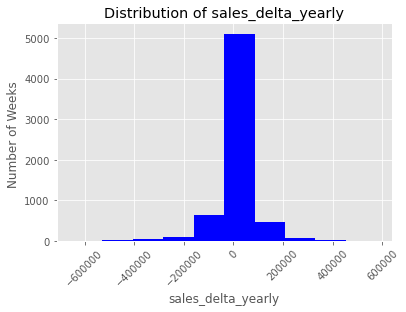

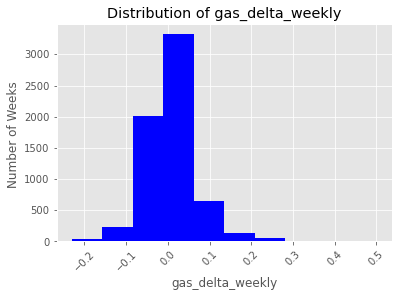

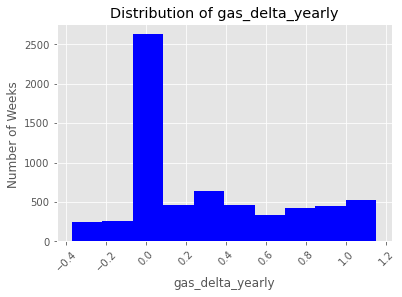

In [16]:
distribution(df)

In [17]:
df.groupby('store_type').mean()

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_size,year,quarter,week_of_year,deflated_series,sales_delta_weekly,sales_delta_yearly,gas_delta_weekly,gas_delta_yearly
store_type,,,,,,,,,,,,,,,,
A,21.000000,1.482672e+06,0.06993,59.239161,3.340094,174.757753,7.765653,190992.5,2010.965035,2.482517,25.818182,8906.690283,-978.989969,14575.669241,0.007297,0.292073
B,20.266667,8.846799e+05,0.06993,55.589744,3.399310,161.490490,8.075424,109865.0,2010.965035,2.482517,25.818182,5982.302406,-541.140233,-167.391510,0.007837,0.300490
C,31.100000,4.189779e+05,0.06993,68.887413,3.334636,180.351532,8.351736,39511.7,2010.965035,2.482517,25.818182,2423.983427,-172.004965,3115.993161,0.007524,0.290769


Store type:  A


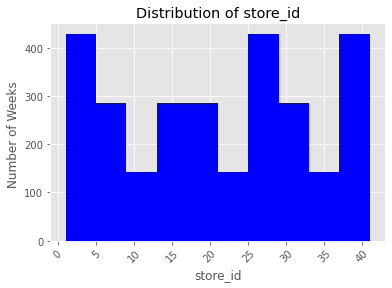

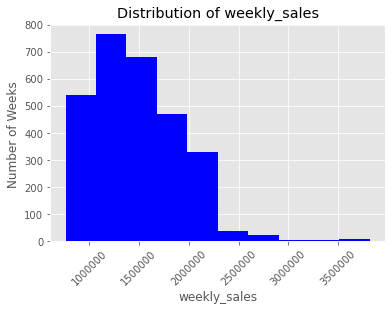

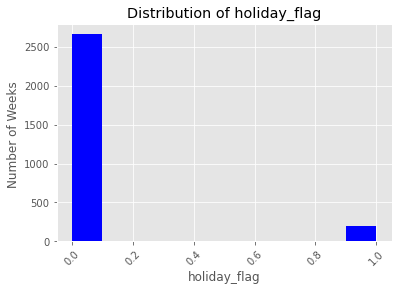

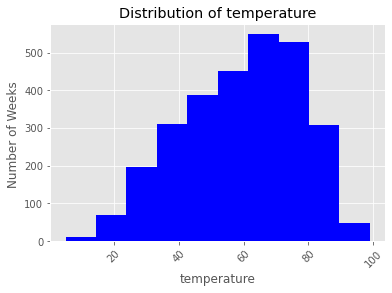

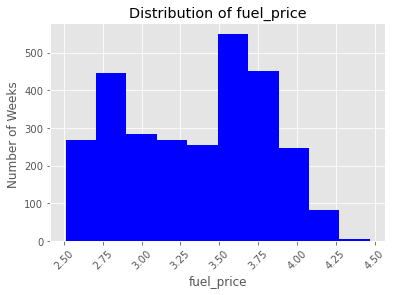

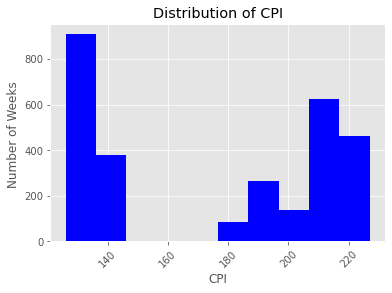

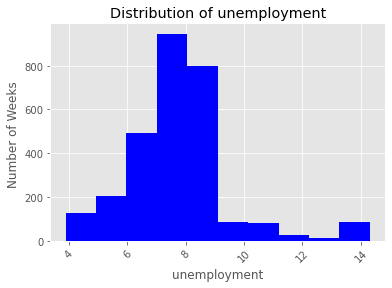

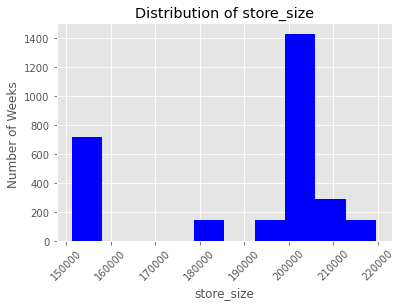

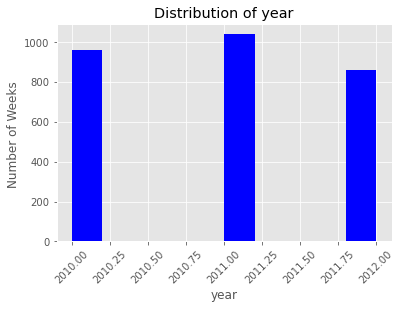

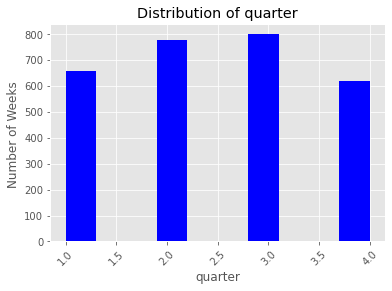

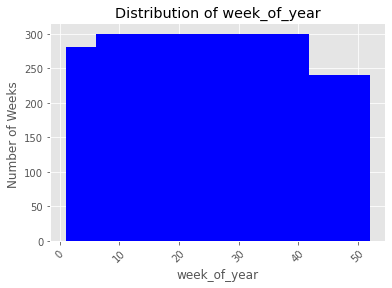

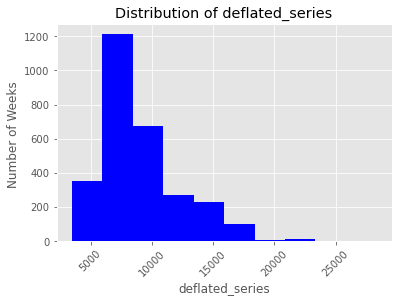

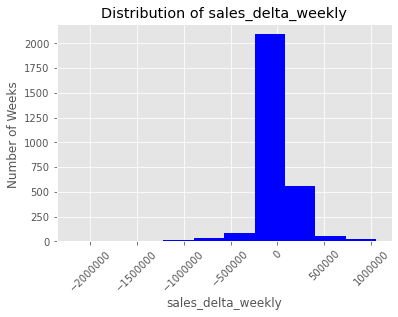

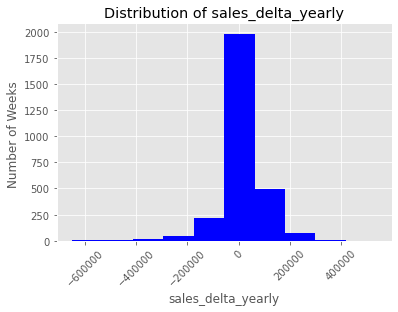

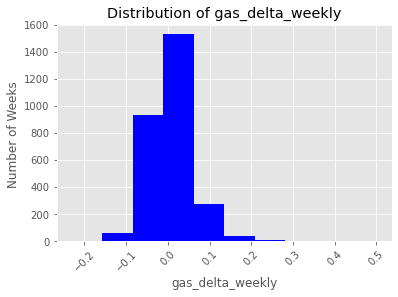

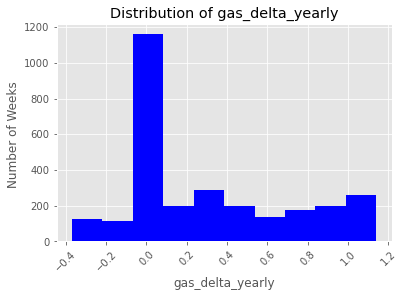

Store type:  B


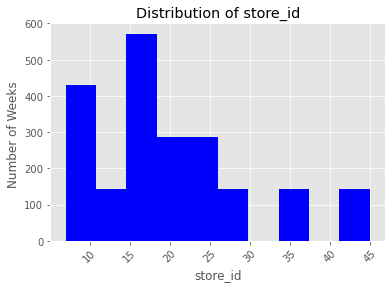

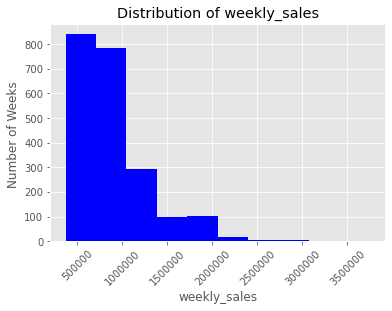

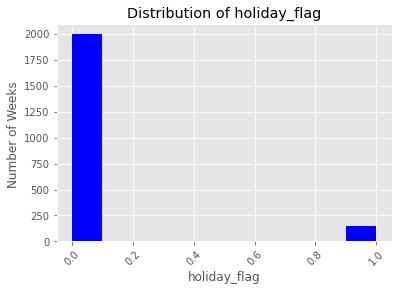

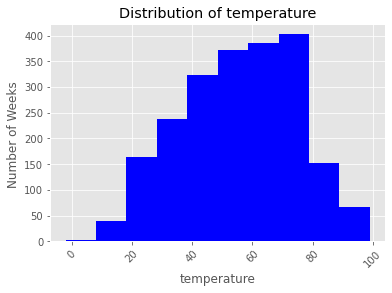

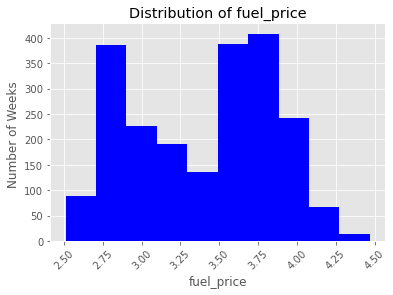

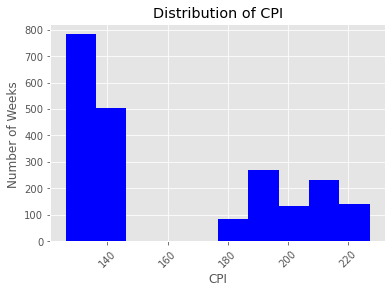

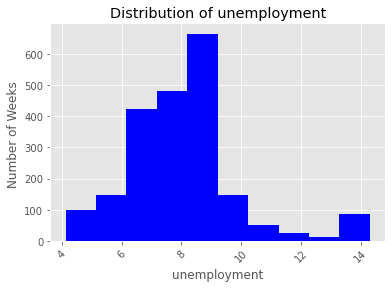

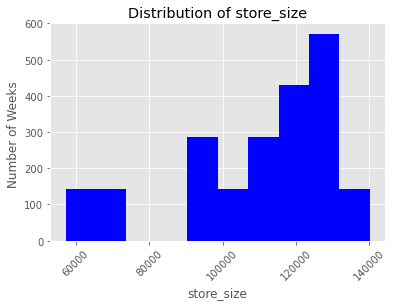

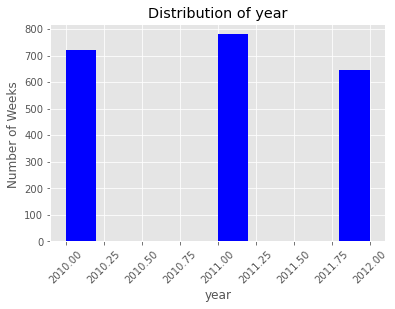

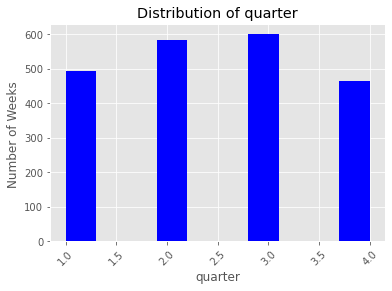

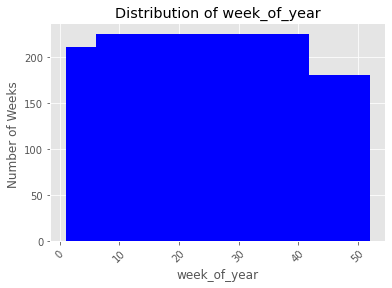

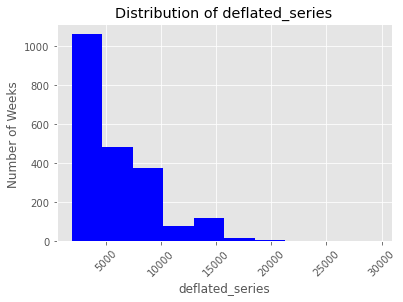

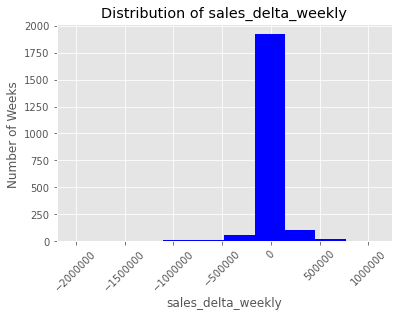

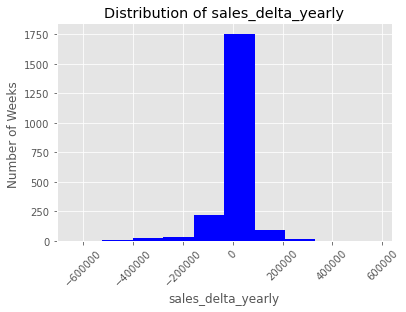

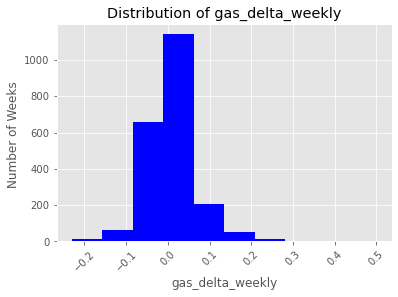

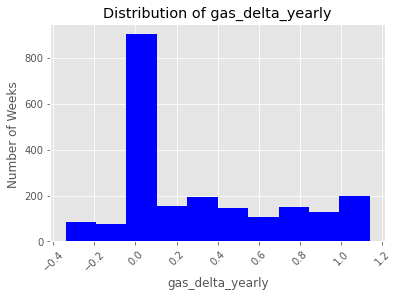

Store type:  C


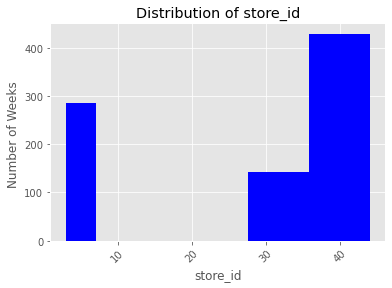

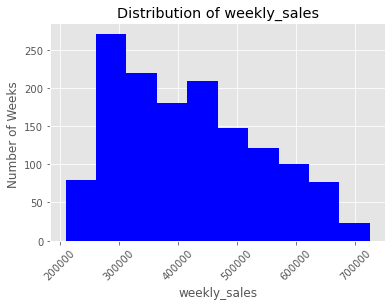

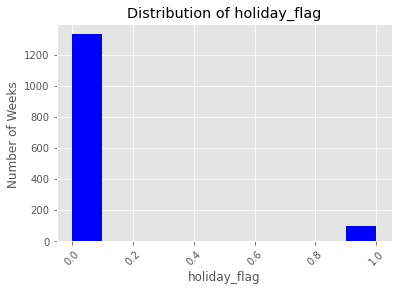

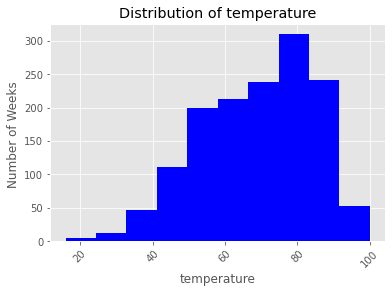

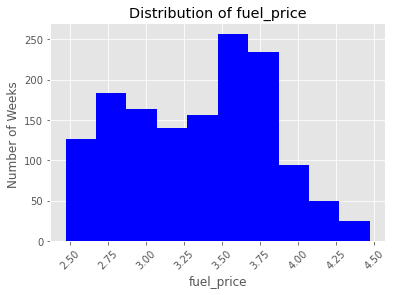

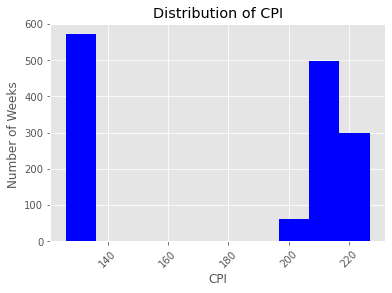

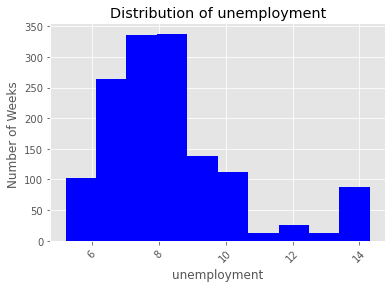

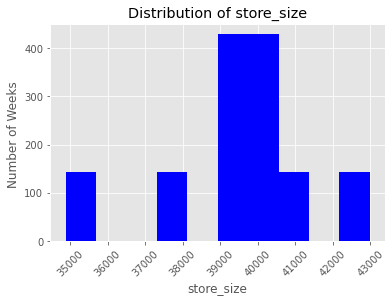

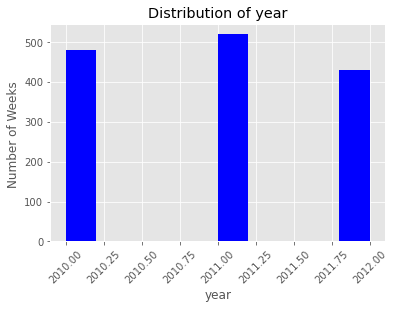

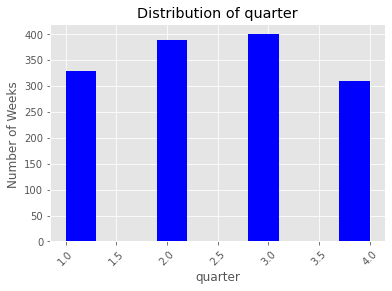

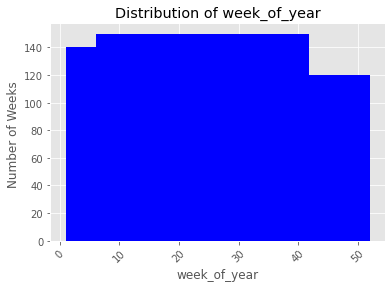

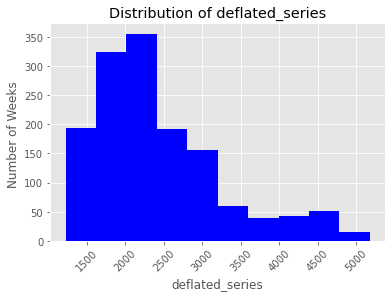

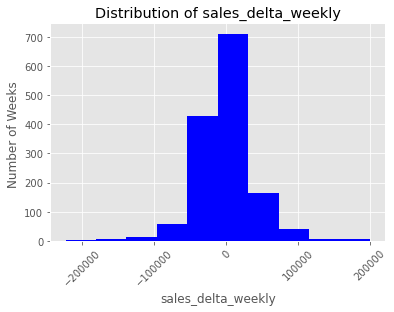

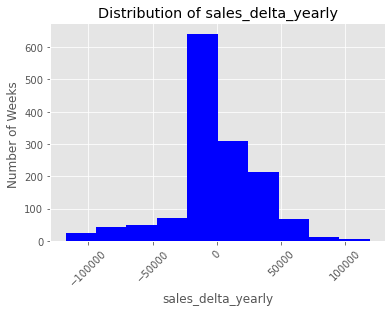

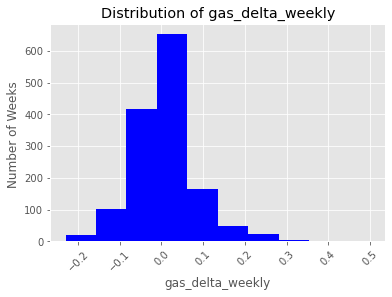

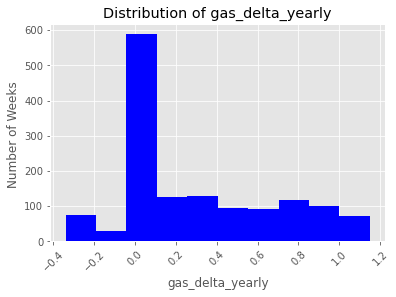

In [18]:
#let see distribution by store type
store_type = ["A", "B", "C"]
for store in store_type:
    print("Store type: ", store)
    distribution(df[df.store_type == store])
    

In [19]:
#how many stores are Type C
len(df[df.store_type == 'C'].store_id.value_counts())

10

In [20]:
# storeid for type c
df[df.store_type == 'C'].store_size.value_counts()

39910    429
39690    429
42988    143
37392    143
41062    143
34875    143
Name: store_size, dtype: int64

In [21]:
#store if for type B
df[df.store_type == 'B'].store_size.value_counts().sort_index()

57197     143
70713     143
93188     143
93638     143
103681    143
112238    143
114533    143
118221    143
119557    143
120653    143
123737    143
125833    143
126512    143
128107    143
140167    143
Name: store_size, dtype: int64

In [22]:
#how many stores are Type B
len(df[df.store_type == 'B'].store_id.value_counts().sort_index())

15

In [23]:
#store_Id for type A
df[df.store_type == 'A'].store_size.value_counts().sort_index()

151315    143
152513    143
155078    143
155083    143
158114    143
184109    143
196321    143
200898    143
202307    143
202505    143
203007    143
203742    143
203750    143
203819    286
204184    143
205863    143
206302    143
207499    143
219622    143
Name: store_size, dtype: int64

In [24]:
##how many stores are Type A
len(df[df.store_type == 'A'].store_id.value_counts().sort_index())

20

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            6435 non-null   int64  
 1   weekly_sales        6435 non-null   float64
 2   holiday_flag        6435 non-null   int64  
 3   temperature         6435 non-null   int64  
 4   fuel_price          6435 non-null   float64
 5   CPI                 6435 non-null   float64
 6   unemployment        6435 non-null   float64
 7   store_type          6435 non-null   object 
 8   store_size          6435 non-null   int64  
 9   month               6435 non-null   object 
 10  year                6435 non-null   int64  
 11  quarter             6435 non-null   int64  
 12  weekday             6435 non-null   object 
 13  week_of_year        6435 non-null   int64  
 14  deflated_series     6435 non-null   float64
 15  sales_delta_weekly  6435 non-null   f

In [63]:
df.tail(1)

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,...,quarter,weekday,week_of_year,deflated_series,sales_delta_weekly,sales_delta_yearly,gas_delta_weekly,gas_delta_yearly,season,holiday_name
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-26,45,760281.43,0,58,3.88,192.309,8.667,B,118221,October,...,4,Friday,43,3953.44,42155.9,-21413.14,-0.09,0.31,Fall,no_holiday


In [64]:
df.shape

(6435, 21)

# dummies 

we are going to create dummies for :
- Holiday_name


In [26]:
#create dummy variables for 5 columns
def create_multiple_dummies (df, dumm_col = ['holiday_name', 'season', 'store_type', 'month', 'year']):
    '''
    Takes in a df and columns to create dummies.
    retunr the original df with de new columns (dimmies)
    '''
    #the column year is an integer we need to conver as string
    df['year']= df['year'].astype('string')
    #create dummy variables 
    for col in dumm_col:
        #create dummies
        df_dummies = pd.get_dummies(df[col], dummy_na=False)
        #  concat df_dummies with my df
        df = pd.concat([df, df_dummies], axis =1)
    #drop no_holiday columns and year
    df = df.drop(columns = ['no_holiday', 'year'])
    return df

In [34]:
def create_dummies (df, dumm_col = ['holiday_name']):
    '''
    Takes in a df and columns to create dummies.
    retunr the original df with de new columns (dummies)
    '''
    #create dummy variables 
    for col in dumm_col:
        #create dummies
        df_dummies = pd.get_dummies(df[col], dummy_na=False)
        #  concat df_dummies with my df
        df = pd.concat([df, df_dummies], axis =1)
    #drop no_holiday columns and year
    df = df.drop(columns = ['no_holiday'])
    return df

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            6435 non-null   int64  
 1   weekly_sales        6435 non-null   float64
 2   holiday_flag        6435 non-null   int64  
 3   temperature         6435 non-null   int64  
 4   fuel_price          6435 non-null   float64
 5   CPI                 6435 non-null   float64
 6   unemployment        6435 non-null   float64
 7   store_type          6435 non-null   object 
 8   store_size          6435 non-null   int64  
 9   month               6435 non-null   object 
 10  year                6435 non-null   int64  
 11  quarter             6435 non-null   int64  
 12  weekday             6435 non-null   object 
 13  week_of_year        6435 non-null   int64  
 14  deflated_series     6435 non-null   float64
 15  sales_delta_weekly  6435 non-null   f

In [36]:
df2 = create_dummies(df)

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            6435 non-null   int64  
 1   weekly_sales        6435 non-null   float64
 2   holiday_flag        6435 non-null   int64  
 3   temperature         6435 non-null   int64  
 4   fuel_price          6435 non-null   float64
 5   CPI                 6435 non-null   float64
 6   unemployment        6435 non-null   float64
 7   store_type          6435 non-null   object 
 8   store_size          6435 non-null   int64  
 9   month               6435 non-null   object 
 10  year                6435 non-null   int64  
 11  quarter             6435 non-null   int64  
 12  weekday             6435 non-null   object 
 13  week_of_year        6435 non-null   int64  
 14  deflated_series     6435 non-null   float64
 15  sales_delta_weekly  6435 non-null   f

In [ ]:
df2.columns

# Create new columns

In [ ]:
#we need to create new columns for is pre- christmas  and tax_season

In [ ]:
#checking the previous weeks for christmas

In [38]:
df2.head(1)

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,...,sales_delta_weekly,sales_delta_yearly,gas_delta_weekly,gas_delta_yearly,season,holiday_name,christmas,labor_day,super_bowl,thanksgiving
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1643690.9,0,42,2.57,211.096,8.106,A,151315,February,...,0.0,0.0,0.0,0.0,Winter,no_holiday,0,0,0,0


create a new column for is pre_christmas

-Christmas:

    - 31-Dec-10,  (pre_christmas = 24-Dec-10, 17-Dec 10)
    - 30-Dec-11, (pre_christmas = 23-Dec-11, 16-Dec 11)

In [51]:
#add zeros to everything
df2 ['pre_christmas'] = 0

In [69]:
df2.columns

Index(['store_id', 'weekly_sales', 'holiday_flag', 'temperature', 'fuel_price',
       'CPI', 'unemployment', 'store_type', 'store_size', 'month', 'year',
       'quarter', 'weekday', 'week_of_year', 'deflated_series',
       'sales_delta_weekly', 'sales_delta_yearly', 'gas_delta_weekly',
       'gas_delta_yearly', 'season', 'holiday_name', 'christmas', 'labor_day',
       'super_bowl', 'thanksgiving', 'pre_christmas'],
      dtype='object')

In [70]:
#getting the list for pre_christmas
pre_c= ['2010-12-24', '2010-12-17', '2011-12-23', '2011-12-16']

In [72]:
#add value 1 for only pre_christmas weeks
df2.loc[pre_c, 'pre_christmas'] = 1

In [75]:
#checking if we add the value 
df2.loc[pre_c, 'pre_christmas'].value_counts()

1    180
Name: pre_christmas, dtype: int64

In [76]:
#CHECK THE VALUES
df2['pre_christmas'].value_counts()

0    6255
1     180
Name: pre_christmas, dtype: int64

In [98]:
#ADD TAX SEASON

###  first 2 weeks of April
- 2010-04-02 & 2010-04-09
- 2011-04-01 & 2011-04-08
- 2012-04-06 & 2012-04-13

In [99]:
df2['tax_season'] = 0 

In [100]:
#getting the list for tax
tax= ['2010-04-02 ', '2010-04-09', '2011-04-01', '2011-04-08', '2012-04-06', '2012-04-13']

In [101]:
#add value 1 for only for the list above
df2.loc[tax, 'tax_season'] = 1

In [102]:
#CHECK THE VALUES
df2['tax_season'].value_counts()

0    6165
1     270
Name: tax_season, dtype: int64

we are going to encode some columns and see which if these columns perform better that dummies

# Scale

In [ ]:
df2.shape

In [ ]:
df2.head(1)

before scaling we need to split our data


In [ ]:
#select only the numeric columns 
num_df = df2.select_dtypes(exclude='object').drop(columns=['store_id'])

In [ ]:
num_df.shape

In [ ]:
num_df.head()

In [ ]:
#split
X_train, y_train, X_test, y_test = new_wrangle.train_test(num_df, 'weekly_sales')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [ ]:
def scaled_df ( train_df , test_df, columns,  scaler):
    '''
    Take in a 3 df and a type of scaler that you  want to  use. it will scale all columns
    except object type. Fit a scaler only in train and tramnsform in train, validate and test.
    returns  new dfs with the scaled columns.
    scaler : MinMaxScaler() or RobustScaler(), StandardScaler() 
    Example:
    scaled_df( X_train , X_test, columns , RobustScaler())
    
    '''
    #import
    from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
    # fit our scaler
    scaler.fit(train_df[columns])
    # get our scaled arrays
    train_scaled = scaler.transform(train_df[columns])
    test_scaled= scaler.transform(test_df[columns])

    # convert arrays to dataframes
    train_scaled_df = pd.DataFrame(train_scaled, columns=columns).set_index([train_df.index.values])
    test_scaled_df = pd.DataFrame(test_scaled, columns=columns).set_index([test_df.index.values])

    #add the columns that are not scaled
    train_scaled_df = pd.concat([train_scaled_df, train_df.drop(columns = columns) ], axis= 1 )
    test_scaled_df = pd.concat([test_scaled_df, test_df.drop(columns = columns) ], axis= 1 )
    #plot
    for col in columns: 
        plt.figure(figsize=(13, 6))
        plt.subplot(121)
        plt.hist(train_df[col], ec='black')
        plt.title('Original')
        plt.xlabel(col)
        plt.ylabel("counts")
        plt.subplot(122)
        plt.hist(train_scaled_df[col],  ec='black')
        plt.title('Scaled')
        plt.xlabel(col)
        plt.ylabel("counts")



    return train_scaled_df,  test_scaled_df

In [ ]:
columns =  X_train.columns.to_list()

In [ ]:
train_Xscaled_df,  test_Xscaled_df= scaled_df( X_train , X_test, columns , MinMaxScaler())

In [ ]:
def train_test(df, target):
    '''
    This function brings in the dataframe and the target feature
    then returns X_train, y_train, X_test and y_test with their respective shapes
    '''
    train = df[:'05-2012'] # includes everything until june 2016
    test = df['06-2012':"2012"] #includes last 6 months

    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]

    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]

    # Have function print datasets shape
    print(f'X_train -> {X_train.shape}')
    print(f'X_test -> {X_test.shape}')

    return train, X_train, y_train, X_test, y_test

In [ ]:
def prepare_modeling_dummies (df, target, scaler):
    '''
    takes in a df and creates dummy variablesn, select only the n umeric columns and  split into X_train, y_train, 
    X_test, y_test and scaled X_train, X_test.
    return   X_train_scaled, y_train_scaled, X_test, y_test
    '''
    # function that creates dummy variables
    df2 = create_dummies(df)

    #select only the numeric columns 
    num_df = df2.drop(columns=['store_id'])

    #split
    train, X_train, y_train, X_test, y_test = train_test(num_df, target)

    #select the columns to scale
    columns =  X_train.select_dtypes(exclude='object').columns.to_list()
    #scale 
    X_train_scaled, X_test_scaled = scaled_df( X_train , X_test, columns , scaler)

    return train, X_train_scaled, X_test_scaled, y_train, y_test
        
        
        
        
    

In [ ]:
import prepare as pre

In [ ]:
train, X_train_scaled, y_train_scaled, X_test, y_test = prepare_modeling_dummies (df, 'weekly_sales', MinMaxScaler())

In [ ]:
train.shape

In [ ]:
X_train_scaled.shape

# Explore 

In [ ]:
df.shape

In [ ]:
train.shape

In [ ]:
train.head(1)

In [ ]:
train.info()

In [ ]:
plt.figure(figsize=(8, 10))
sns.histplot(train,
                 x=train['weekly_sales'],
                 #hue='loan_status',
                 multiple='layer'
                 )
plt.title("Distribution of Loan Status")
plt.xlabel('Weekly sales in dollars')
plt.ylabel('Number of weeks')
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')

plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(train['weekly_sales'])
plt.xticks(rotation=45)
#plt.ticklabel_format(style = 'plain')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(train['weekly_sales'])
plt.xlim(2500000)
plt.show()

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, linewidth=0.5)
plt.show()

In [ ]:
train.shape

In [ ]:
train.corr().weekly_sales.sort_values()

In [ ]:
plt.figure(figsize=(12, 10))
sns.jointplot(x= 'weekly_sales', y= 'store_size', data = train, hue ='Winter')

In [ ]:
plt.figure(figsize=(12, 10))
sns.jointplot(x= 'weekly_sales', y= 'store_size', data = train, hue ='Summer')

In [ ]:
train.columns

In [ ]:
plt.figure(figsize=(12, 10))
sns.jointplot(x= 'weekly_sales', y= 'temperature', data = train, hue= "season")

In [ ]:
winter_df = train[train.season == "Winter"][['weekly_sales', 'temperature', 'season']]
winter_df.head()

In [ ]:
sns.jointplot(x= 'weekly_sales', y= 'temperature', data = winter_df, hue= "season")

In [ ]:
train.season.unique()

In [ ]:
color_list = ['blue','green', 'red', 'orange']

In [ ]:
for season, color in zip(train.season.unique(), color_list):
    print(season, color)

In [ ]:

for season, c in zip(train.season.unique(), color_list):
    print(season)
    sns.jointplot(x= 'weekly_sales', y= 'temperature', data = train[train.season==season], color= c)
    plt.show()

In [ ]:
sns.boxplot(x= train['weekly_sales'] )

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x= train['holiday_name'], y =train['weekly_sales'] )

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x= train['season'], y =train['weekly_sales'] )

In [ ]:
for season, c in zip(train.season.unique(), color_list):
    print(season)
    sns.boxplot(x= train[train.season== season]['weekly_sales'], color = c )
    plt.show()

In [ ]:
#let's focus on my target
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['weekly_sales']].sort_values(by='weekly_sales', ascending=False), vmin=-3, vmax=3, annot=True, cmap='coolwarm')